In [1]:
import pandas as pd
import numpy as np

from lets_plot import *


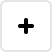
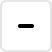
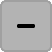
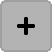
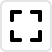
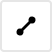
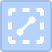
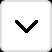
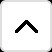
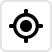
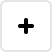
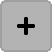
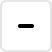
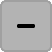
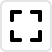
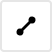
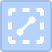
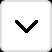
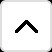
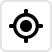

In [2]:
LetsPlot.setup_html()

In [3]:
mpg_df = pd.read_csv("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/mpg.csv")
mpg_df.head(3)

Unnamed: 0 manufacturer model  displ  year  cyl       trans drv  cty  hwy  \
0           1         audi    a4    1.8  1999    4    auto(l5)   f   18   29   
1           2         audi    a4    1.8  1999    4  manual(m5)   f   21   29   
2           3         audi    a4    2.0  2008    4  manual(m6)   f   20   31   

  fl    class  
0  p  compact  
1  p  compact  
2  p  compact

In [4]:
class_df = mpg_df.groupby('class').hwy.agg(['min', 'median', 'max', 'count']).reset_index()

In [5]:
from scipy.stats import multivariate_normal
def generate_random_data(size=50, mean=[0, 0], cov=[[1, .5], [.5, 1]], seed=42):
    np.random.seed(seed)
    x = np.linspace(-1, 1, size)
    y = np.linspace(-1, 1, size)
    X, Y = np.meshgrid(x, y)
    Z = multivariate_normal(mean, cov).pdf(np.dstack((X, Y)))
    return pd.DataFrame({'x': X.flatten(), 'y': Y.flatten(), 'z': Z.flatten()})

random_df = generate_random_data()

In [6]:
def plots_with_legend_key_stgs(p):
    p = p + guides(color=guide_legend(ncol=3)) + theme(plot_background=element_rect(size=1), legend_position='bottom')
    return gggrid([
        p,
        p + theme(legend_key=element_rect()),
        p + theme(legend_key=element_rect(), legend_key_size=33),
        p + theme(legend_key=element_rect(linetype=2, fill='light_green', color='dark_green'),
                  legend_key_width=55, legend_key_height=15),
    ], ncol=2)

# Colorbar

In [7]:
plots_with_legend_key_stgs(
    ggplot(mpg_df, aes('cty', 'hwy')) + geom_point(aes(color='hwy'))
)

#### point

In [8]:
plots_with_legend_key_stgs(
    ggplot(mpg_df, aes('cty', 'hwy')) + geom_point(aes(color='class'))
)

 #### boxplot/crossbar

In [9]:
plots_with_legend_key_stgs(
    ggplot(mpg_df, aes('class', 'hwy')) +  geom_boxplot(aes(color='class'))
)

In [10]:
plots_with_legend_key_stgs(
    ggplot(class_df, aes(x='class')) + geom_crossbar(aes(ymin='min', y='median', ymax='max', color='class'))
)

#### error bar

In [11]:
plots_with_legend_key_stgs(
    ggplot(class_df, aes(x='class')) + geom_errorbar(aes(ymin='min', ymax='max', color='class'))
)

#### dotplot

In [21]:
plots_with_legend_key_stgs(
    ggplot(mpg_df, aes(x='hwy')) + geom_dotplot(aes(fill='class'))
)

#### raster


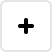
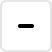
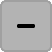
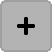
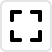
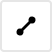
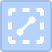
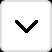
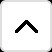
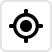
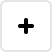
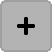
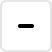
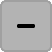
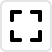
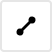
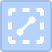
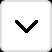
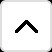
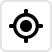

In [13]:
from scipy.stats import multivariate_normal
from lets_plot import *
LetsPlot.setup_html()
np.random.seed(42)
n = 5
x = np.linspace(-1, 1, n)
y = np.linspace(-1, 1, n)
X, Y = np.meshgrid(x, y)
mean = np.zeros(2)
cov = [[1, -.5],
       [-.5, 1]]
rv = multivariate_normal(mean, cov)
Z = rv.pdf(np.dstack((X, Y)))
data = {'x': X.flatten(), 'y': Y.flatten(), 'z': Z.flatten()}

plots_with_legend_key_stgs(
    ggplot(data) +
    geom_raster(aes(x='x', y='y', fill=as_discrete('z')))
)

#### vline

In [14]:
n = 100
classes = ['a', 'b', 'c']
np.random.seed(42)
x = np.random.normal(size=n)
y = np.random.normal(size=n)
c = np.random.choice(classes, size=n)
df = pd.DataFrame({'x': x, 'y': y, 'c': c})

bounds_df = pd.DataFrame([(cl, df[df.c == cl].x.max()) for cl in classes], \
                         columns=['c', 'xmax'])


plots_with_legend_key_stgs(
    ggplot() 
        + geom_vline(aes(xintercept='xmax', color='c'), 
                     data=bounds_df, size=.7, linetype='longdash')
        + geom_point(aes(x='x', y='y', color='c'), data=df) 

)
    

#### hline - several  layers

In [15]:
bounds_df = pd.DataFrame([(cl, df[df.c == cl].y.max()) for cl in classes], \
                         columns=['c', 'ymax'])
plots_with_legend_key_stgs(
    ggplot()
       + geom_hline(aes(yintercept='ymax', color='c'),
                    data=bounds_df, size=.7, linetype='longdash') 
       + geom_point(aes(x='x', y='y', color='c'), data=df)

)

In [16]:
#### lollipop

In [17]:
plots_with_legend_key_stgs(
    ggplot({
        'x': [-3, -2, -1, 0, 1, 2, 3],
        'y': [2, 3, -2, 3, -1, 0, 4],
    }, aes('x', 'y')) + geom_lollipop(aes(color=as_discrete('x')))
)

#### pie

In [18]:
plots_with_legend_key_stgs(
    ggplot({'name': ['a', 'b', 'c'], 'value': [40, 90, 10]}) + 
    geom_pie(aes(slice='value', fill='name'), stat='identity')
)

#### composite - point_range

In [19]:
plots_with_legend_key_stgs(
    ggplot(class_df, aes(x='class')) + geom_pointrange(aes(ymin='min', y='median', ymax='max', color='class')) 
)

#### text

In [20]:
plots_with_legend_key_stgs(
    ggplot(mpg_df, aes('cty', 'hwy')) + geom_text(aes(label='fl', color='class'))
)